In [62]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import utils 
import numpy as np

In [63]:

font_path = r'C:\WINDOWS\Fonts\malgun.ttf' # 한글 폰트 깨짐 방지
utils.set_Koreantxt(font_path)

[폰트 설정] 
Malgun Gothic


In [64]:
conn = pymysql.connect(host='172.20.181.194', user='Oh', password='1234',
db='team5', charset='utf8')

query = """select pct.year, 
       pct.전체_변화율, 
       pct.일반여행업_변화율, 
       pct.국외여행업_변화율, 
       pct.국내여행업_변화율, 
       pct.국내외여행업_변화율, 
       c.단체여행, 
       c.국내단체여행비, 
       c.해외단체여행비, 
       com.소매판매액지수_증감률,  -- CPI에서 100을 뺌
       com.경제성장률 
from (
    select T1.year,
           ((T1.전체 - T2.전체) / T2.전체) * 100 AS 전체_변화율,
           ((T1.일반여행업 - T2.일반여행업) / T2.일반여행업) * 100 AS 일반여행업_변화율,
           ((T1.국외여행업 - T2.국외여행업) / T2.국외여행업) * 100 AS 국외여행업_변화율, 
           ((T1.국내여행업 - T2.국내여행업) / T2.국내여행업) * 100 AS 국내여행업_변화율, 
           ((T1.국내외여행업 - T2.국내외여행업) / T2.국내외여행업) * 100 AS 국내외여행업_변화율
    from ys_travel_industry_revenue as T1
    inner join ys_travel_industry_revenue as T2
    on T1.year - 1 = T2.year
    order by T1.year
) as pct
inner join cpi as c on pct.year = c.year
inner join common as com on pct.year = com.year
where c.year between 2008 and 2023 
and com.year between 2008 and 2023"""

cur = conn.cursor()
cur.execute(query)

rows = cur.fetchall() # 모든 데이터를 가져옴


travel_industry_revenue_df = pd.DataFrame(rows ,columns = ['year','전체_변화율','일반여행업_변화율','국외여행업_변화율','국내여행업_변화율','국내외여행업_변화율','cpi_단체여행','cpi_국내단체여행비','cpi_해외단체여행비','csi_common', 'growth'])


cur.close()
conn.close()

In [65]:
travel_industry_revenue_df=travel_industry_revenue_df.set_index('year')

C:\Users\KDP-48\AppData\Local\Temp\ipykernel_1644\4193073785.py:9: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.savefig("graph.png", dpi=300, transparent=True)


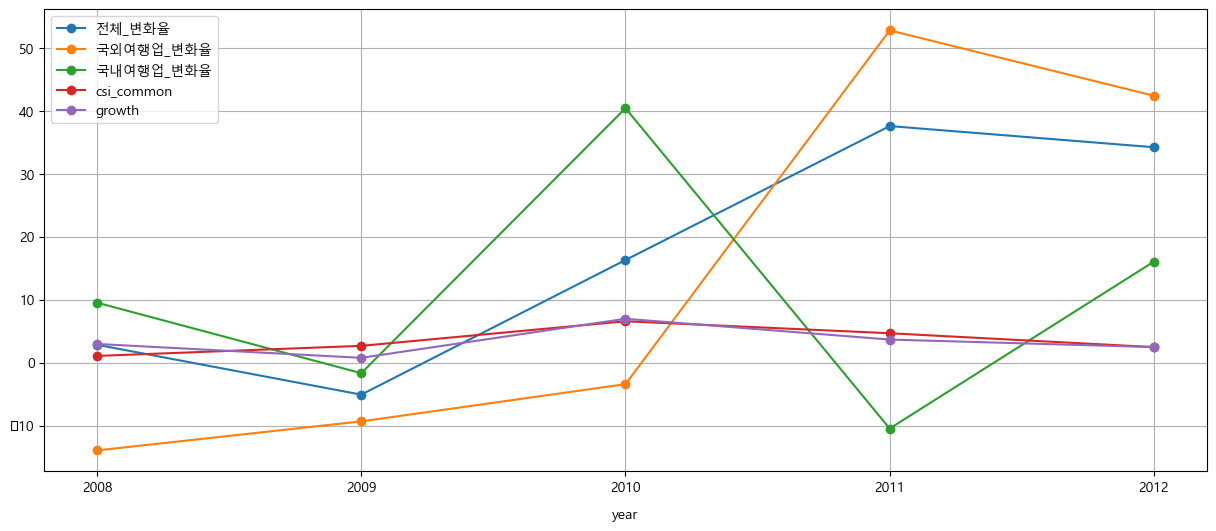

In [69]:
plt.figure(figsize=(15,6))
for col in ['전체_변화율','국외여행업_변화율','국내여행업_변화율','csi_common','growth']:
    plt.plot(travel_industry_revenue_df.index, travel_industry_revenue_df[col], marker='o', label=col)

plt.xticks(travel_industry_revenue_df.index)
plt.xlabel('year', fontsize=10, labelpad=10)
plt.legend()
plt.grid()
plt.savefig("graph.png", dpi=300, transparent=True)
plt.show()

전체(파란색): 2010년을 기점으로 하락 후 상승.

일반여행업(주황색): 2010년 하락 후 점진적 감소.

국외여행업(초록색): 2010년 급락 후 2011년에 반등.

국내여행업(빨간색): 2010년에 큰 폭으로 하락 후 2012년에 다시 증가.

국내외여행업(보라색): 비교적 안정적인 추이지만 2010년에 하락.


- 2010년에 여행업 전반적으로 큰 하락이 발생 → 경제적 충격 혹은 정책 변화 가능성.
- 국외여행업과 국내여행업의 변동성이 큼 → 여행업의 유형별 차이가 존재함.

<hr>

In [67]:
# 상관관계 분석
correlation = travel_industry_revenue_df.corr()
correlation

,전체_변화율,일반여행업_변화율,국외여행업_변화율,국내여행업_변화율,국내외여행업_변화율,cpi_단체여행,cpi_국내단체여행비,cpi_해외단체여행비,csi_common,growth
전체_변화율,1.000000,0.967283,0.938491,-0.050962,0.916327,0.934445,0.901513,0.756219,0.353270,0.299496
일반여행업_변화율,0.967283,1.000000,0.940795,-0.175936,0.831267,0.829108,0.827803,0.623029,0.460333,0.299837
국외여행업_변화율,0.938491,0.940795,1.000000,-0.354165,0.880736,0.901999,0.850994,0.730287,0.185077,-0.016773
국내여행업_변화율,-0.050962,-0.175936,-0.354165,1.000000,-0.180593,-0.061337,0.139318,-0.188538,0.443301,0.724211
국내외여행업_변화율,0.916327,0.831267,0.880736,-0.180593,1.000000,0.958601,0.761344,0.952361,-0.022807,0.089108
cpi_단체여행,0.934445,0.829108,0.901999,-0.061337,0.958601,1.000000,0.900545,0.891418,0.050925,0.077558
cpi_국내단체여행비,0.901513,0.827803,0.850994,0.139318,0.761344,0.900545,1.000000,0.608886,0.369081,0.221849
cpi_해외단체여행비,0.756219,0.623029,0.730287,-0.188538,0.952361,0.891418,0.608886,1.000000,-0.298362,-0.061920
csi_common,0.353270,0.460333,0.185077,0.443301,-0.022807,0.050925,0.369081,-0.298362,1.000000,0.789609
growth,0.299496,0.299837,-0.016773,0.724211,0.089108,0.077558,0.221849,-0.061920,0.789609,1.000000


C:\Users\KDP-48\AppData\Local\Temp\ipykernel_1644\2651940469.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.savefig("graph.png", dpi=300, transparent=True)
c:\Users\KDP-48\anaconda3\envs\bigdata\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


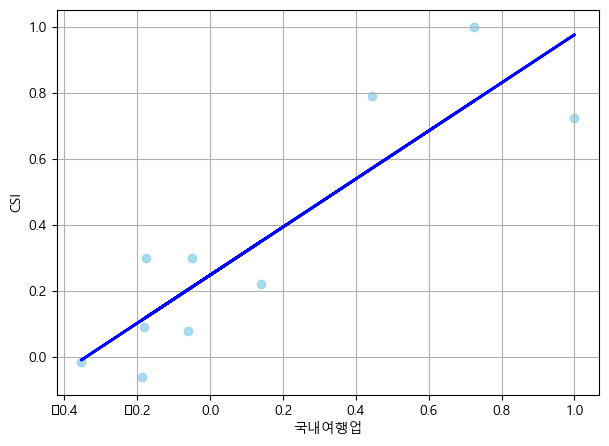

In [68]:
xData = correlation["국내여행업_변화율"]
yData1 = correlation["growth"]




# 산점도 그리기
plt.figure(figsize=(7, 5))
plt.scatter(xData, yData1, alpha=0.7, color="skyblue")

slope, intercept = np.polyfit(xData, yData1, 1)  # 1차 다항식(직선) 피팅
trend_line = slope * xData + intercept  # 회귀선 방정식

# 추세선 추가
plt.plot(xData, trend_line, color="blue", linewidth=2, linestyle="solid", label="Trend Line")

# 제목 및 라벨 설정

plt.xlabel("국내여행업")
plt.ylabel("CSI")
plt.grid()

# 그래프 출력
plt.savefig("graph.png", dpi=300, transparent=True)
plt.show()


- cpi_단체여행 vs 전체_변화율 = 0.93
  
  → 물가가 상승할수록 여행업 매출도 증가하는 경향이 있음.  
  
  → 여행 비용이 오르더라도 사람들이 여전히 여행을 감행하는 경우가 많음.  
  
  → 특히 단체여행은 물가와 강한 양의 상관관계를 가짐.  


<hr>
물가가 오를수록 여행업 매출도 증가하는 패턴을 보임.  
이는 여행이 단순한 사치재가 아니라, 필수적 지출 혹은 소득 수준이 높은 계층이 주로 소비하는 특성을 가질 가능성이 있음.  

---

2. 경제 성장률(GDP)과 여행업의 관계
- growth vs 국내여행업_변화율 = 0.72  
  → 국내여행업은 경제 성장과 밀접한 관계가 있음.  
  → 경제 성장률이 높아질수록 국내여행 수요도 함께 증가하는 경향.  
  → 즉, 국내 경제가 활성화될수록 사람들이 더 많은 돈을 국내 여행에 지출함.  

<hr>
경제 성장(GDP)이 상승하면 국내여행 소비도 함께 증가하는 패턴을 보임.  
이는 국내여행이 경기 영향을 많이 받는 업종임을 시사하며, 경제가 불황일 때 국내여행업이 가장 먼저 타격을 받을 가능성이 높음.  


✔ 물가(CPI)와 여행업 매출 간의 강한 양의 상관관계 존재 → 여행비가 상승해도 여행 수요는 유지됨.  
✔ 국내 여행은 경제 성장과 밀접한 연관이 있음 → 경기 침체 시 국내 여행 수요가 크게 줄어들 가능성.  



1. 국내여행업과 경제 성장률이 밀접하게 연결됨

:경제 성장이 활발할수록 국내 여행이 증가하는 경향이 있음.
반면, 국외여행업은 경제 성장률보다는 환율이나 글로벌 경제 요인에 더 영향을 받을 가능성이 큼.

